# SHAP

## Instalação

In [1]:
%pip install shap

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


**Biblioteca**

In [4]:
import shap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

## Ingestão de Dados

In [5]:
# Carregar conjunto de dados
iris = load_iris()
X, y = iris.data, iris.target

## Preparação dos Dados

In [6]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinamento do Modelo

In [7]:
# Treinar um modelo de floresta aleatória
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Obtenção dos valores SHAP

In [8]:
# Usar o pacote SHAP para explicar as previsões do modelo
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizar as explicações para uma única instância
shap.initjs()

# Esses são os valores de SHAP
shap_values

[array([[-3.12262743e-02, -5.41957765e-03, -1.54747852e-01,
         -1.45939629e-01],
        [-3.13752482e-02,  3.57433144e-02,  3.24654202e-01,
          3.33644398e-01],
        [-3.24561246e-02, -3.37449733e-03, -1.56201481e-01,
         -1.45301231e-01],
        [-3.32500839e-02, -3.03862527e-03, -1.55104995e-01,
         -1.45939629e-01],
        [-3.19300527e-02, -3.94428520e-03, -1.56531105e-01,
         -1.44927891e-01],
        [ 7.19366396e-02,  9.48787559e-04,  2.92664925e-01,
          2.97116314e-01],
        [-3.32500839e-02, -3.03862527e-03, -1.55104995e-01,
         -1.45939629e-01],
        [-3.57461124e-02, -6.69576490e-05, -1.56137836e-01,
         -1.45382427e-01],
        [-3.12262743e-02, -5.41957765e-03, -1.54747852e-01,
         -1.45939629e-01],
        [-3.12262743e-02, -5.41957765e-03, -1.54747852e-01,
         -1.45939629e-01],
        [-3.57461124e-02, -6.69576490e-05, -1.56137836e-01,
         -1.45382427e-01],
        [ 7.59802904e-02,  1.15454226e-04, 

### Force Plot

O Force Plot descreve o impacto que cada característica tem em uma previsão específica feita pelo modelo.

No Force Plot, as características são listadas como contribuintes ao longo de um eixo horizontal. Cada característica contribui para "empurrar" o resultado previsto em uma direção ou outra. O valor base (também conhecido como "expected value") representa a previsão média do modelo sobre todo o conjunto de dados. Cada característica age como uma "força" que "empurra" essa previsão base na direção do resultado real para a instância específica que você está investigando.

Aqui estão alguns pontos chave sobre como interpretar um gráfico Force Plot:

1. **Eixo Horizontal**: Representa o espaço de resultado. Ele se estende desde o valor base até o valor da previsão final para a instância específica.
  
2. **Características**: Cada característica é representada como uma seta. A direção da seta indica se a característica está aumentando ou diminuindo a previsão. 
  
3. **Cor**: As cores (geralmente vermelho e azul) indicam o efeito da característica. Por exemplo, o vermelho pode indicar um aumento no valor previsto, enquanto o azul pode indicar uma diminuição.
  
4. **Magnitude**: O tamanho da seta ou a extensão da barra indica a magnitude do impacto da característica. Uma seta maior significa que a característica teve um impacto maior na previsão.

Este tipo de gráfico é muito útil para entender previsões individuais e pode ser fundamental para aplicações em que a interpretabilidade é crucial, como na medicina ou em decisões financeiras.

In [9]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0], feature_names=iris.feature_names)

### Summary Plot

O "Summary Plot" serve para apresentar uma visão geral da importância das características em um modelo de aprendizado de máquina. O Summary Plot ajuda a entender o impacto das características em todo o conjunto de dados ou um subconjunto do mesmo.

Aqui estão os principais elementos de um Summary Plot:

### Elementos Verticais:
1. **Características (Features)**: No eixo vertical, você verá os nomes das características do modelo.
   
### Elementos Horizontais:
1. **Valores de SHAP**: No eixo horizontal, você verá os valores de SHAP para cada característica. Estes valores medem a importância e o impacto de uma característica na previsão.
  
2. **Pontos (Bee-swarm/Scatter)**: Cada ponto no gráfico representa o valor de SHAP de uma característica para uma instância específica no conjunto de dados. A posição do ponto ao longo do eixo horizontal mostra o quanto essa característica afetou a previsão para essa instância.

### Cores:
1. **Cores**: Os pontos são geralmente coloridos de acordo com o valor real da característica, ajudando você a entender como valores altos ou baixos da característica afetam a previsão.

### Interpretação:

1. **Posição Horizontal dos Pontos**: Um ponto à direita sugere que a característica contribuiu para aumentar a previsão para essa instância específica, enquanto um ponto à esquerda sugere que a característica contribuiu para diminuí-la.

2. **Importância da Característica**: Características mais importantes são normalmente listadas no topo do gráfico, e sua importância é determinada pela média do valor absoluto dos valores de SHAP para essa característica.

O Summary Plot é muito útil para:

- Identificar quais características são mais importantes em geral para um modelo.
- Compreender como as características interagem entre si e influenciam as previsões.
- Fornecer intuições que podem ajudar na engenharia de características e na melhoria do modelo.

Esse tipo de visualização é muito poderoso para entender modelos complexos em uma forma resumida e é amplamente utilizado em análises de interpretabilidade de modelos.

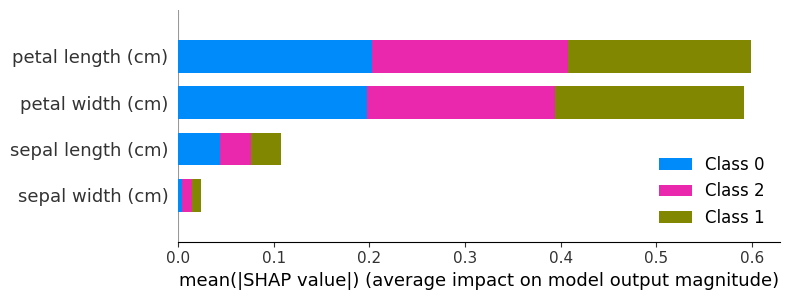

In [9]:
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names)


### Dependence Plot

O "Dependence Plot" é uma forma de visualização que mostra como os valores de SHAP para uma determinada característica se relacionam com os valores reais dessa característica em todo o conjunto de dados ou um subconjunto dele. Esse gráfico é particularmente útil para entender como uma característica específica afeta a saída do modelo.

### Principais elementos de um Dependence Plot:

1. **Eixo Horizontal (X-Axis)**: Mostra os valores reais da característica que você está investigando.

2. **Eixo Vertical (Y-Axis)**: Mostra os valores de SHAP correspondentes a essa característica.

3. **Pontos**: Cada ponto no gráfico representa uma instância específica no conjunto de dados. A posição do ponto mostra o valor real da característica e seu valor de SHAP associado.

4. **Cor**: Os pontos geralmente podem ser coloridos por outra característica. Isso ajuda a entender interações entre diferentes características.

### Interpretação:

1. **Tendência**: Uma linha de melhor ajuste (opcional) pode ser traçada para mostrar a tendência geral. Isso ajuda a entender se a relação é linear, não-linear, ou mais complexa.

2. **Interação**: Se os pontos são coloridos por uma segunda característica, você pode ver como a interação entre as duas características afeta o valor de SHAP. Isso pode revelar informações valiosas sobre a sinergia ou interdependência entre as características.

3. **Dispersão**: A dispersão dos pontos em torno da linha de melhor ajuste pode indicar a variabilidade no efeito da característica. Uma dispersão alta pode sugerir que outras características ou interações podem estar influenciando a saída.

O Dependence Plot é uma excelente ferramenta para:

- Compreender como os valores de uma característica individual afetam a previsão.
- Identificar possíveis interações entre características.
- Detectar não-linearidades no relacionamento entre a característica e a previsão.

Esse tipo de gráfico oferece insights valiosos em várias aplicações, especialmente quando você precisa entender como diferentes características e suas interações contribuem para a previsão de um modelo.

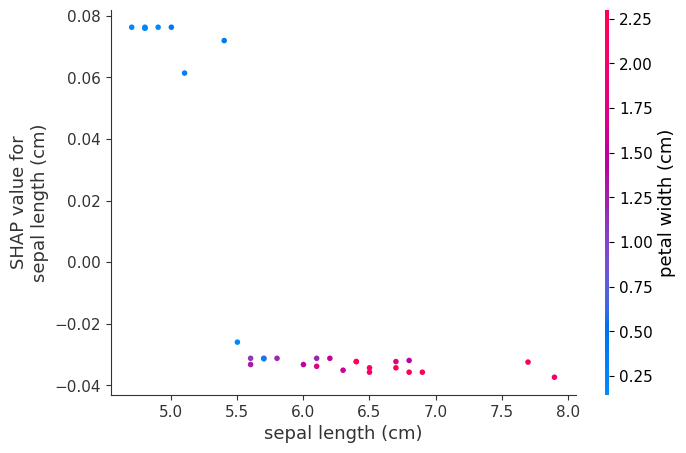

In [10]:
# Para a primeira classe e primeira característica
shap.dependence_plot(0, shap_values[0], X_test, feature_names=iris.feature_names)

### Decision Plot

Um Decision Plot ajuda a entender como várias características contribuem para uma previsão específica ou para várias previsões, passo a passo.

### Elementos Principais de um Decision Plot:

1. **Eixo Horizontal (X-Axis)**: Geralmente mostra o efeito cumulativo das características na previsão, começando de um valor base até a previsão final.

2. **Eixo Vertical (Y-Axis)**: Mostra as características que estão sendo consideradas, geralmente em ordem de importância ou de acordo com a sequência em que contribuem para a previsão.

3. **Linhas**: Cada linha representa o caminho de decisão para uma instância específica, mostrando como a previsão muda à medida que cada característica é considerada.

### Interpretação:

1. **Ordem de Características**: Você pode ver qual característica é considerada primeiro, segunda, etc., o que dá uma ideia da importância relativa das características.

2. **Efeito Cumulativo**: Ao seguir uma linha desde o valor base até o final, você pode ver como cada característica altera a previsão cumulativamente.

3. **Comparação entre Instâncias**: Se o gráfico mostra linhas para múltiplas instâncias, você pode comparar como diferentes instâncias são afetadas por características similares ou diferentes.

4. **Valores Base e Finais**: O ponto inicial de cada linha é geralmente o "valor base", que é a previsão feita sem considerar qualquer característica. O ponto final é a previsão real, considerando todas as características.

O Decision Plot é útil para:

- Analisar o efeito cumulativo das características em modelos complexos.
- Comparar como diferentes instâncias são avaliadas pelo modelo.
- Entender a importância relativa das características em um modelo.

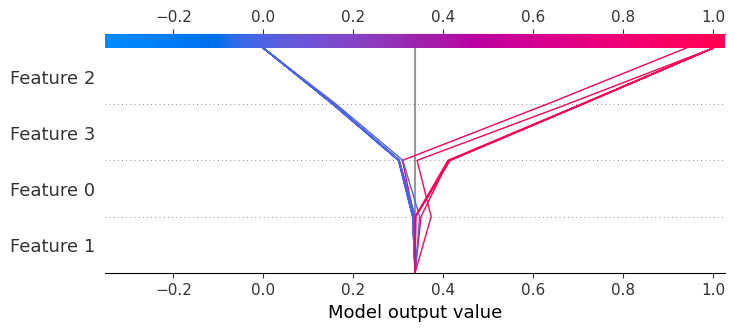

In [11]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test)

### Waterfall Plot

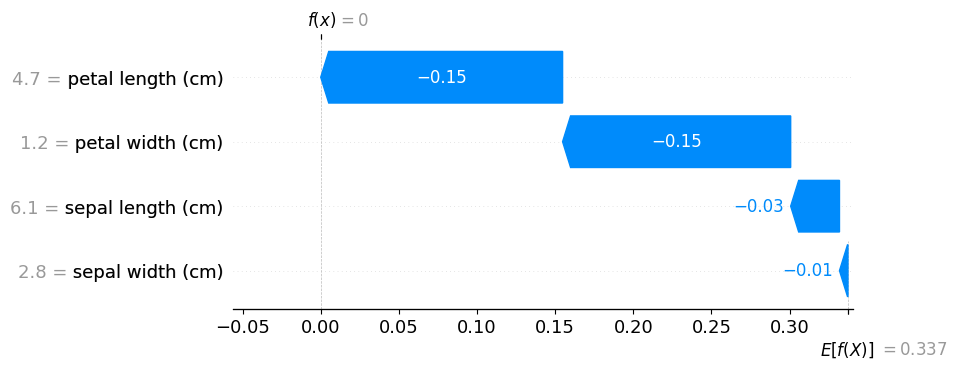

In [16]:
# Cria um objeto de explicação com os valores de SHAP e os valores de características
explanation = shap.Explanation(values=shap_values[0][0], 
                               base_values=explainer.expected_value[0], 
                               data=X_test[0], 
                               feature_names=iris.feature_names)

# Gera o gráfico waterfall
shap.waterfall_plot(explanation)

### Bee Swarm Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


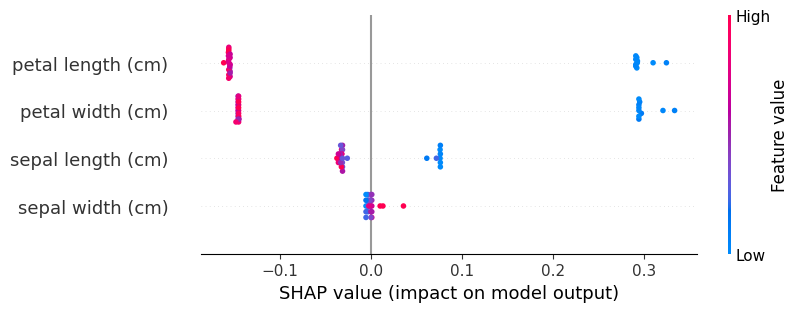

In [20]:
# Criar um objeto Explanation para uma classe específica (e.g., classe 0)
explanation = shap.Explanation(values=shap_values[0], 
                               base_values=explainer.expected_value[0], 
                               data=X_test, 
                               feature_names=iris.feature_names)

# Usar o objeto Explanation no gráfico beeswarm
shap.plots.beeswarm(explanation, max_display=10)